# Data Analysis
 
 We have our PreProcessed Data from the previous Notebook where we applied various techniques to clean our data<br> and make it more readable and efficient to perform data analysis techniques. <br>
 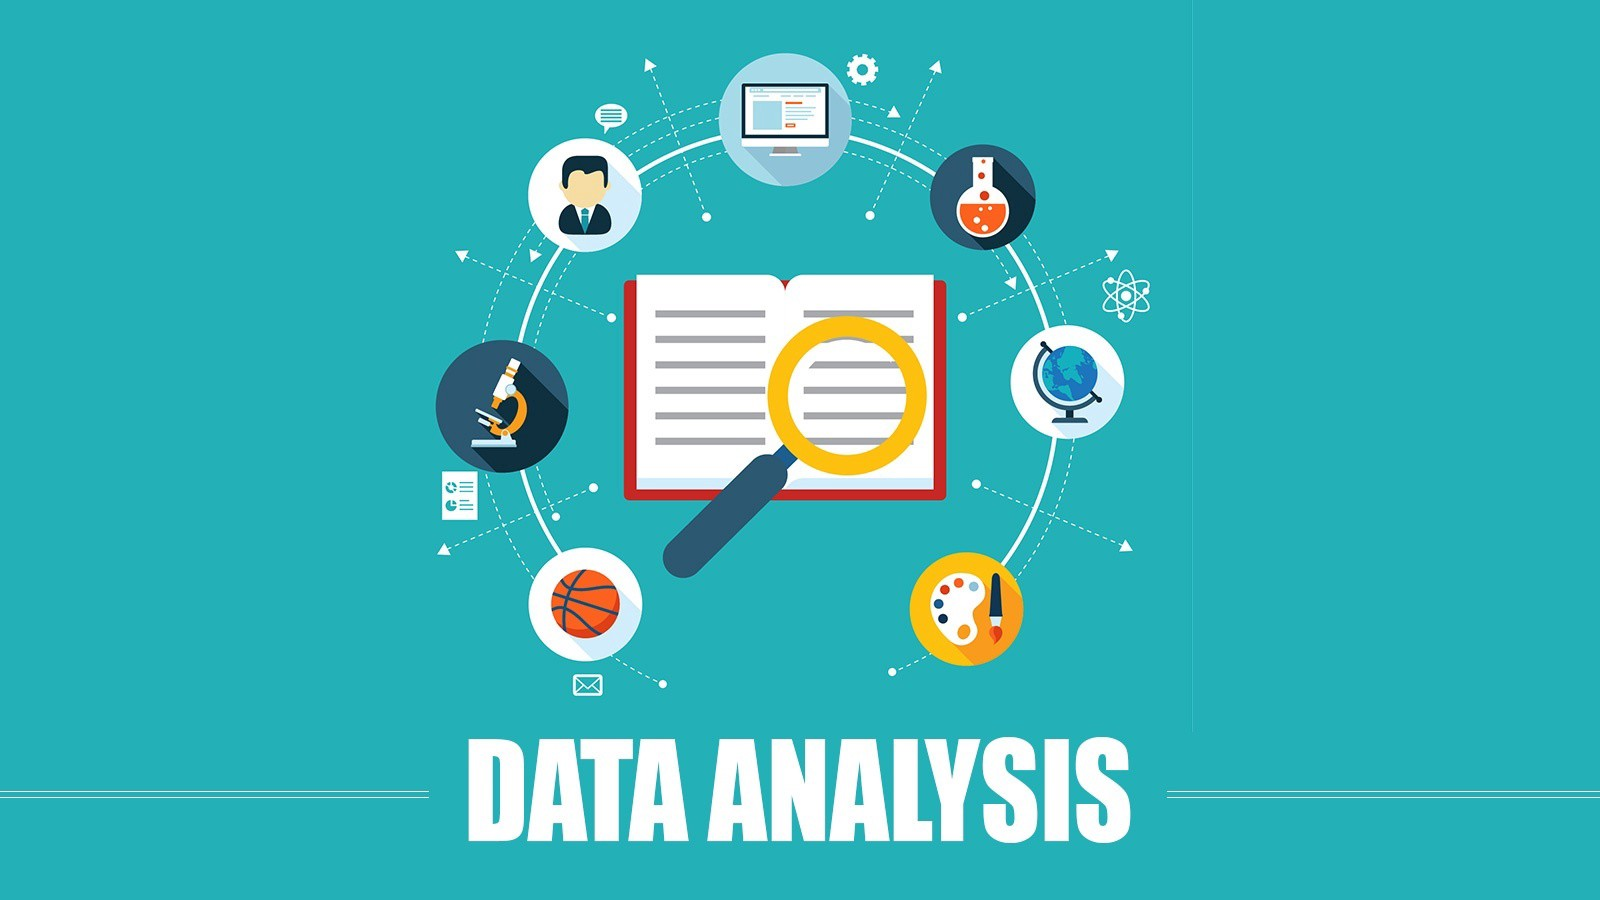
<br><br>
In this notebook we will be performing following given Techniques for Analysis:<br>
1.Assosciation Rule mining using Apriori<br>
2.Outlier Detection using Grubb's Test<br>
3.Cluster Validation using Hopkins Statistics<br>
4.Clustering using K-Means and Dendograms<br>


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
#reading data from the data folder
data = pd.read_csv('../data/preprocessed_data.csv') #importing data

### Preparing our Data for the various analysis techniques that we will be usnig in this notebook
We already have our preprocessed data from previous notebook but here we make some 
additional changes in order to suit the techniques we will be using for analysis

In [3]:
#removing an extra column and reading data
data=data.drop(["Unnamed: 0"],axis=1)
data.head(3)

,name,department_name,designation,selection_mode,general_total,genral_total_female,sc_total,sc_total_female,st_total,st_total_females,...,obc_total_females,total_total_persons,total_total_females,pwd_total_persons,pwd_total_females,muslim_minority_total_persons,muslim_minority_total_females,other_minority_total_persons,other_minority_total_females,Total
0,"""All Saints College of Technology, Jaipur Jaba...",ALLIED SCIENCE,Assistant Professor,1,11.0,8.0,0.0,0.0,0.0,0.0,...,0.0,11,8,0,0,8.0,6.0,0.0,0.0,52.0
1,"""All Saints College of Technology, Jaipur Jaba...",ALLIED SCIENCE,Associate Professor,1,6.0,6.0,0.0,0.0,0.0,0.0,...,0.0,6,6,0,0,4.0,4.0,0.0,0.0,32.0
2,"""All Saints College of Technology, Jaipur Jaba...",ALLIED SCIENCE,Professor & Equivalent,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0,0,0,0.0,0.0,0.0,0.0,2.0


In [4]:
#Here we remove unnessary columns which we do not need for any task that we will be performing for data analysis in this project
#These columns don't provide any imp. information ,forexample they have female data given separately,but we will be working 
# with total male and female so we remove columns having only females data
data=data.drop(["selection_mode","genral_total_female","sc_total_female","st_total_females","obc_total_females","total_total_persons","total_total_females","pwd_total_females","muslim_minority_total_females","other_minority_total_females","Total"],axis=1)

In [5]:
#We make a copy of this data which we need for clustering further in this notebook and we will modify dfc as needed there
#Here we also view our data after removing unnecessary columns
dfc=data.copy()
data.head()

,name,department_name,designation,general_total,sc_total,st_total,obc_total,pwd_total_persons,muslim_minority_total_persons,other_minority_total_persons
0,"""All Saints College of Technology, Jaipur Jaba...",ALLIED SCIENCE,Assistant Professor,11.0,0.0,0.0,0.0,0,8.0,0.0
1,"""All Saints College of Technology, Jaipur Jaba...",ALLIED SCIENCE,Associate Professor,6.0,0.0,0.0,0.0,0,4.0,0.0
2,"""All Saints College of Technology, Jaipur Jaba...",ALLIED SCIENCE,Professor & Equivalent,1.0,0.0,0.0,0.0,0,0.0,0.0
3,"""All Saints College of Technology, Jaipur Jaba...",Anonymous,Principal,1.0,0.0,0.0,0.0,0,1.0,0.0
4,"""All Saints College of Technology, Jaipur Jaba...",CIVIL ENGINEERING,Assistant Professor,16.0,0.0,0.0,0.0,0,3.0,0.0


In [6]:
#Here we replace the of recruits in each column to their category so as to perform Association Rule Mining
# and view our data after making those changes
data.loc[(data.general_total > 0),'general_total']='general'
data.loc[(data.sc_total > 0),'sc_total']='sc'
data.loc[(data.st_total > 0),'st_total']='st'
data.loc[(data.obc_total > 0),'obc_total']='obc'
data.loc[(data.pwd_total_persons > 0),'pwd_total_persons']='pwd'
data.loc[(data.muslim_minority_total_persons > 0),'muslim_minority_total_persons']='muslim_minority'
data.loc[(data.other_minority_total_persons > 0),'other_minority_total_persons']='other_minority'
data.head(3) #display modified dataframe having categories in place of numerial data

,name,department_name,designation,general_total,sc_total,st_total,obc_total,pwd_total_persons,muslim_minority_total_persons,other_minority_total_persons
0,"""All Saints College of Technology, Jaipur Jaba...",ALLIED SCIENCE,Assistant Professor,general,0,0,0,0,muslim_minority,0
1,"""All Saints College of Technology, Jaipur Jaba...",ALLIED SCIENCE,Associate Professor,general,0,0,0,0,muslim_minority,0
2,"""All Saints College of Technology, Jaipur Jaba...",ALLIED SCIENCE,Professor & Equivalent,general,0,0,0,0,0,0


In [7]:
#we remove the department name Anonymous as it is not a department and was named to all the entries
#which didn't have a department name during the preprocessing task
indexNames = data[data['department_name']=='Anonymous'].index

data.drop(indexNames,inplace=True)
data["department_name"].unique()
#now we see our data does not have any department name as anonymous

array(['ALLIED SCIENCE', 'CIVIL ENGINEERING',
       'COMPUTER SCIENCE AND ENGINEERING', ...,
       'BACHOLAR OF COMPUTER APPLICATION', 'LAW DEPARMENT',
       'office management'], dtype=object)

In [8]:
df=data.copy()  # now df has the modified csv as pandas dataframe  


# Apriori Algorithm for Association Rule Mining
Apriori Algorithm
The apriori principle can reduce the number of itemsets we need to examine. Put simply, the apriori principle states that

if an itemset is infrequent, then all its supersets must also be infrequent

This means that if {beer} was found to be infrequent, we can expect {beer, pizza} to be equally or even more infrequent. So in consolidating the list of popular itemsets, we need not consider {beer, pizza}, nor any other itemset configuration that contains beer.

Finding itemsets with high support
Using the apriori principle, the number of itemsets that have to be examined can be pruned, and the list of popular itemsets can be obtained in these steps:

Step 0. Start with itemsets containing just a single item, such as {apple} and {pear}.

Step 1. Determine the support for itemsets. Keep the itemsets that meet your minimum support threshold, and remove itemsets that do not.

Step 2. Using the itemsets you have kept from Step 1, generate all the possible itemset configurations.

Step 3. Repeat Steps 1 & 2 until there are no more new itemsets.


This iterative process is illustrated in the animated GIF below:

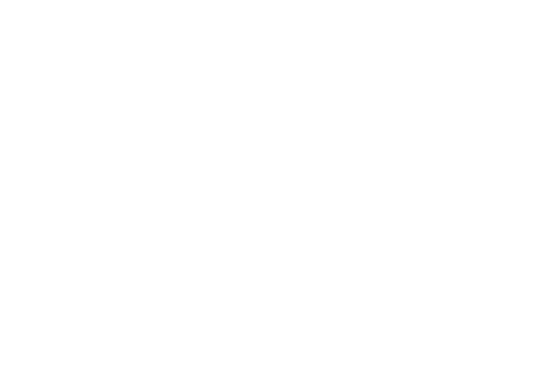

Reducing candidate itemsets using the Apriori Algorithm<br>
As seen in the animation, {apple} was determine to have low support, hence it was removed and all other itemset configurations that contain apple need not be considered. This reduced the number of itemsets to consider by more than half.

Note that the support threshold that you pick in Step 1 could be based on formal analysis or past experience. If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold.

In [10]:
#Function to create 1-itemset for the data
def createC1(data):     #creating unique items
    C1 = []
    for transaction in data:
        for item in transaction:
            if not [item] in C1:
                if str(item) != 'nan':
                     C1.append([item])

    return list(map(frozenset, C1))



In [11]:
#Generating frequent k-itemsets after pruning the infrequent itemsets
def generateLk(D, Ck, minSupport):   #creating Lk(frequent itemsets)
    supportcount = {}           #dictionary to store supportcount of k-itemsets
    for transaction in D:
        for candidate in Ck:
            if candidate.issubset(transaction):
                if not candidate in supportcount:
                    supportcount[candidate]=1
                else:
                    supportcount[candidate] += 1
    Lk = []
    supportData = {}
    n = len(D)
    for items in supportcount:
        support = supportcount[items]/n
        if support >= minSupport:
            Lk.insert(0,items)
        supportData[items] = support
    return Lk, supportData


In [12]:
#generating k itemsets from k-1 frequent itemsets
def generateCk(Lk, k): #creates Ck
    Ck = []
    for i in range(len(Lk)):
        for j in range(i+1, len(Lk)):    #generating all possible supersets of size k
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            if L1==L2:
                Ck.append(Lk[i] | Lk[j])
    return Ck


In [13]:
#Function to generate all frequent itemsets
def Apriori(dataSet, minSupport):
    C1 = createC1(dataSet)
    D = list(map(set, dataSet))
    L1, supportData = generateLk(D, C1, minSupport)
    L = [L1]
    k = 2
    while (len(L[k-2]) > 0):
        Ck = generateCk(L[k-2], k)
        Lk, supK = generateLk(D, Ck, minSupport)
        supportData.update(supK)
        L.append(Lk)
        k += 1
    return L, supportData

#L, supportData = Apriori(data,0.01)
#print(L)

In [14]:
#Function to calculate confidence of each rule
def calculateConfidence(frequentitemset, itemset, supportData, rulelist, minConfidence):
    pitemset = []
    for consequence in itemset:
        confidence = supportData[frequentitemset]/supportData[frequentitemset-consequence] #calc confidence
        if confidence >= minConfidence:
            print(frequentitemset-consequence,'->',consequence,'conf:',confidence)
            rulelist.append((frequentitemset-consequence, consequence, confidence))
            pitemset.append(consequence)
    return pitemset

In [15]:
#function to generating rules satisfying confidence limit
def generateInterestingRules(L, supportData, minimumConfidence):   #L-frequent itemset
    rulelist = []
    for i in range(1, len(L)):
        for frequentitemset in L[i]:
            itemset = [frozenset([item]) for item in frequentitemset]
            if (i > 1):
                Conseqrules(frequentitemset, itemset, supportData, rulelist, minimumConfidence)
            else:
                calculateConfidence(frequentitemset, itemset, supportData, rulelist, minimumConfidence)
    return rulelist



In [16]:
#Function to generate consequent rules
def Conseqrules(frequentitemset, itemset, supportData, rulelist, minimumConfidence):
    length = len(itemset[0])
    if (len(frequentitemset) > (length + 1)):
        Hmp1 = generateCk(itemset, length+1)
        Hmp1 = calculateConfidence(frequentitemset, Hmp1, supportData, rulelist, minimumConfidence)
        if (len(Hmp1) > 1):
            Conseqrules(frequentitemset, Hmp1, supportData, rulelist, minimumConfidence)

#rules = generateInterestingRules(L,supportData,0.5)
#print(supportData)
#for i in range(1, len(L)):
 #       for frequentitemset in L[i]:
  #          print(supportData[frequentitemset])

#### -> Apriori on Categories of Faculty

In [17]:
#we are performing apriori and as we need a transaction data for this
#here we prepare a transational data from each entry with the categories they have
transactions = []
for i in range(0,len(data)):
    sub=[]
    for j in range(3,9):
        if (str(data.values[i,j]) !="0" and str(data.values[i,j]) != "0.0"):
            sub.append(str(data.values[i,j]))
    transactions.append(sub)
transactions[0:5]  
#we finally obtain a list of lists having the required data in transactional form

[['general', 'muslim_minority'],
 ['general', 'muslim_minority'],
 ['general'],
 ['general', 'muslim_minority'],
 ['general', 'muslim_minority']]

In [18]:
#having a view at our numpy array
data=np.array(transactions)   #data has the transactional data of categories as numpy array
data

array([list(['general', 'muslim_minority']),
       list(['general', 'muslim_minority']), list(['general']), ...,
       list(['general']), list(['general', 'obc']), list(['general'])],
      dtype=object)

In [19]:
#Here we call the Apriori Function on the data that contains categories in form of transactional data 
# and interesting rules are generated between the categories along with their confidence intervals
#these rules suggests us which two categories are most likely to appear together 
#and which category is highly probable to appear with a given set of categories 
L, supportData = Apriori(data,0.01)
#print(L)
rules = generateInterestingRules(L,supportData,0.5)


frozenset({'st'}) -> frozenset({'general'}) conf: 0.5838350924417369
frozenset({'sc'}) -> frozenset({'general'}) conf: 0.6294221260160013
frozenset({'obc'}) -> frozenset({'general'}) conf: 0.5280087001077057
frozenset({'sc'}) -> frozenset({'obc'}) conf: 0.5700218586192992
frozenset({'muslim_minority'}) -> frozenset({'general'}) conf: 0.8079562100069385
frozenset({'st', 'sc'}) -> frozenset({'general', 'obc'}) conf: 0.6638749302065885
frozenset({'st', 'obc'}) -> frozenset({'general', 'sc'}) conf: 0.5347024434117823
frozenset({'muslim_minority', 'sc'}) -> frozenset({'general', 'obc'}) conf: 0.6418918918918919


#### -> Apriori on Designation of Faculty

In [20]:
# This is a pre step where we group the data based on college name and department name 
#and form a column having list of designations in that particular college and department
df2=df.groupby(['department_name','name'], as_index = False).agg({'designation': lambda x: (list(x))})
df2.head()

,department_name,name,designation
0,#NAME?,B.A. DANGAR HOMOEOPATHY MEDICAL COLLEGE-RAJKOT,"[Assistant Professor, Associate Professor, Lec..."
1,'C' Leg,Muktajivan Swamibapa Mahila Arts & Commerce Co...,[Assistant Professor]
2,'ka' varg sahitya,Shri Ram Adarsh Sanskrit Ayurveda Vidya Mandir...,[Professor & Equivalent]
3,( MIL)Assamese,K.K. Handique Govt Sanskrit College,[Assistant Professor]
4,(1( PSTE (2) ISTE (3) Action Research / Bed,C328 Govt College of Education Gulbarga,"[Lecturer, Reader, Tutor]"


In [21]:
#here we form a list of lists containing the designation as a transactional data as required by our apriori function
transactions2 = []
for i in range(0,len(df2)):
    sub=[]
    for j in range(0,len(df2.values[i,2])):
       sub.append(str(df2.values[i,2][j]))
    transactions2.append(sub)
transactions2[0:5]

[['Assistant Professor',
  'Associate Professor',
  'Lecturer',
  'Professor & Equivalent',
  'Visiting Teacher'],
 ['Assistant Professor'],
 ['Professor & Equivalent'],
 ['Assistant Professor'],
 ['Lecturer', 'Reader', 'Tutor']]

In [22]:
#the list of lists created above in transaction2 is converted to a numpy array
data2=np.array(transactions2)
data2

array([list(['Assistant Professor', 'Associate Professor', 'Lecturer', 'Professor & Equivalent', 'Visiting Teacher']),
       list(['Assistant Professor']), list(['Professor & Equivalent']),
       ..., list(['Lecturer']), list(['Lecturer']), list(['Lecturer'])],
      dtype=object)

In [23]:
#Here we call the Apriori Function on the data that contains designations in form of transactional data 
# and interesting rules are generated between the designations along with their confidence intervals
#these rules suggests us which two designations are most likely to appear together 
#and which designation is highly probable to appear with a given set of designations
createC1(data2)
L, supportData = Apriori(data2,0.01)
#print(L)
rules = generateInterestingRules(L,supportData,0.5)


frozenset({'Tutor'}) -> frozenset({'Professor & Equivalent'}) conf: 0.5317691029900333
frozenset({'Tutor'}) -> frozenset({'Assistant Professor'}) conf: 0.5448504983388704
frozenset({'Reader'}) -> frozenset({'Lecturer'}) conf: 0.583351636283769
frozenset({'Associate Professor'}) -> frozenset({'Assistant Professor'}) conf: 0.6563829310885237
frozenset({'Professor & Equivalent'}) -> frozenset({'Assistant Professor'}) conf: 0.7546968403074297
frozenset({'Professor & Equivalent'}) -> frozenset({'Associate Professor'}) conf: 0.5969684030742954
frozenset({'Professor & Equivalent'}) -> frozenset({'Associate Professor', 'Assistant Professor'}) conf: 0.5401793339026474


# Grubb's Test for Outlier Detection

$$
\begin{array}{l}{\text { Grubbs' test is defined for the hypothesis: }} \\ {\begin{array}{ll}{\text { Ho: }} &amp; {\text { There are no outliers in the data set }} \\ {\mathrm{H}_{\mathrm{a}} :} &amp; {\text { There is exactly one outlier in the data set }}\end{array}}\end{array}
$$
$$
\begin{array}{l}{\text {The Grubbs' test statistic is defined as: }} \\ {\qquad G_{calculated}=\frac{\max \left|Y_{i}-\overline{Y}\right|}{s}} \\ {\text { with } \overline{Y} \text { and } s \text { denoting the sample mean and standard deviation, respectively. The }} \\ {\text { Grubbs' test statistic is the largest absolute deviation from the sample mean in units of }} \\ {\text { the sample standard deviation. }}\end{array}
$$
$$
G_{critical}=\frac{(N-1)}{\sqrt{N}} \sqrt{\frac{\left(t_{\alpha /(2 N), N-2}\right)^{2}}{N-2+\left(t_{\alpha /(2 N), N-2}\right)^{2}}}
$$
$$
\begin{array}{l}\\ {\qquad G_{calculated}=\frac{\max \left|Y_{i}-\overline{Y}\right|}{s}}\end{array} $$

The test is a deceptively simple one to run. It checks for outliers by looking for the maximum of the absolute differences between the values and the mean. Basically, the steps are:

1.Find the G test statistic.

2.Find the G Critical Value.

3.Compare the test statistic to the G critical value.

4.Reject the point as an outlier if the test statistic is greater than the critical value.

In [24]:
#importing necessary libraries for outliesr detection 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline

#Here we will be observing outliers for the categories General and Obc,
#as they are the prominent categories we will be working on further ahead
#x,y having length and values for General category
#x2,y2 having length and values for Obc category
y = np.array(dfc['general_total'])
y2=np.array(dfc['obc_total'])
x = np.arange(len(y))
x2=np.arange(len(y2))



### viewing the values of both the categories over the entire data



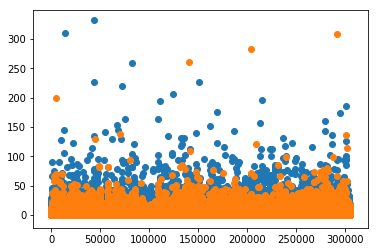

In [25]:
plt.scatter(x,y)
plt.scatter(x2,y2)
#with this scatter plot we get an idea of the outliers present in our data

In [26]:
# list to store the indexes of outliers
listl=[]

In [27]:
# function to calculate Grubb's Statistic value for numpy array received in y
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations/ std_dev
    print("Grubbs Statistics Value : {}".format(Gcal))
    return Gcal, max_ind

# function to calculate the Grubb's Critical value 
# alpha is the confidence interval
def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

# function to check each critical value to the statistical value
def check_G_values(Gs, Gc, inp, max_index):
    if Gs > Gc:
        print('{} is an outlier at {}. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index],max_index, Gs, Gc))
        listl.append(max_index)
    else:
        print('{} is not an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))


#to perform the test for finding given no. of outliers (given in max_outliers)
def ESD_Test(input_series, alpha, max_outliers):
    for iterations in range(max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        check_G_values(Gstat, Gcritical, input_series, max_index)
        input_series = np.delete(input_series, max_index)



In [28]:
# Calling the function for giving us the top 50 outliers in our data
# the function also stores the indexes in a list 
ESD_Test(y2, 0.05, 50)

Grubbs Critical Value: 5.236157681418776
Grubbs Statistics Value : 102.7986496388217
308.0 is an outlier at 291752. G > G-critical: 102.7986 > 5.2362 

Grubbs Critical Value: 5.2361570760048615
Grubbs Statistics Value : 96.10579218050455
283.0 is an outlier at 203890. G > G-critical: 96.1058 > 5.2362 

Grubbs Critical Value: 5.23615647034264
Grubbs Statistics Value : 89.63393508863349
260.0 is an outlier at 140508. G > G-critical: 89.6339 > 5.2362 

Grubbs Critical Value: 5.236155864932556
Grubbs Statistics Value : 69.79285676581053
200.0 is an outlier at 4694. G > G-critical: 69.7929 > 5.2362 

Grubbs Critical Value: 5.236155259524387
Grubbs Statistics Value : 48.434602589204104
138.0 is an outlier at 69857. G > G-critical: 48.4346 > 5.2362 

Grubbs Critical Value: 5.236154653867913
Grubbs Statistics Value : 48.26699120388725
137.0 is an outlier at 301350. G > G-critical: 48.2670 > 5.2362 

Grubbs Critical Value: 5.236154048463573
Grubbs Statistics Value : 45.95820016099144
130.0 is a

In [29]:
# showing the outliers indexes indexes, here we do not remove the outliers ,but they can be easily removed using broadcasting 
listl

[291752,
 203890,
 140508,
 4694,
 69857,
 301350,
 44228,
 208995,
 302237,
 141980,
 239677,
 288389,
 80725,
 231446,
 133493,
 48440,
 48465,
 58053,
 131932,
 281842,
 136617,
 165689,
 277529,
 282352,
 147764,
 268733,
 274509,
 204039,
 175687,
 4694,
 11180,
 123232,
 276105,
 233318,
 291923,
 2644,
 206763,
 148877,
 258120,
 280189,
 112495,
 151354,
 187897,
 78827,
 139152,
 278265,
 5770,
 187890,
 271576,
 2277]

# Preparing Data for K Means Clustering
   
   
   We will be Clustering General, Obc and Sc Categories against the Department names.

In [30]:
# Here we see the different Departments that we have
dfc['department_name'].unique()

array(['ALLIED SCIENCE', 'Anonymous', 'CIVIL ENGINEERING', ...,
       'BACHOLAR OF COMPUTER APPLICATION', 'LAW DEPARMENT',
       'office management'], dtype=object)

In [31]:
# Since we see there are numerous departments clusters produced would not make much sense
# therefore we will reduce the no. of Departents,and here we see the number of entries pertaining to each Department
dfc['department_name'].value_counts()

Anonymous                                         43805
English                                            5519
Commerce                                           4906
Economics                                          4047
History                                            3784
ENGLISH                                            3667
Chemistry                                          3525
Physics                                            3429
Mathematics                                        3306
Political Science                                  3108
COMMERCE                                           3065
Education                                          2748
Hindi                                              2682
Mechanical Engineering                             2592
Zoology                                            2575
Botany                                             2512
ECONOMICS                                          2501
HISTORY                                         

In [32]:
#taking only major departments to perform clustering as there are >30k departments 
#collect is a list of departments that we will be considering to obtain clusters.
#departments are chosen as they form a majority of the data i.e they are departments with most no. of entries
collect=['English','Commerce','Economics']

#collecting indices of departments in collect
ll=[]
for x in collect:
  indexNames = dfc[dfc['department_name']==x].index 
  ll.append(indexNames)

flat_list = [item for sublist in ll for item in sublist]
#print(flat_list)
#removing other deparments
dfc=dfc.iloc[flat_list]
dfc.head()

# dfc dataframe now contains entries with the depatments in collect list

,name,department_name,designation,general_total,sc_total,st_total,obc_total,pwd_total_persons,muslim_minority_total_persons,other_minority_total_persons
691,"+3 Degree College,Sinapali",English,Lecturer,0.0,0.0,0.0,1.0,0,0.000000,0.000000
699,"+3 Degree Womenâs College, Kamakshyanagar, D...",English,Lecturer,0.0,0.0,0.0,1.0,0,0.000000,0.000000
718,"+3 sanda College, Sanda, Hindol Road, Dhenkanal",English,Lecturer,1.0,0.0,0.0,0.0,0,0.000000,0.000000
732,"1- D.P. B.S. Degree college Anoopshahr, (Bulan...",English,Tutor,0.0,0.0,0.0,1.0,0,0.000000,0.000000
760,"100001-KCES'S MOOLJEE JAITHA COLLEGE, JALGAON.",English,Assistant Professor,3.0,1.0,0.0,0.0,0,0.126902,0.134254


In [33]:
dfc.department_name.unique()
# now the no. of departments are reduced to three

array(['English', 'Commerce', 'Economics'], dtype=object)

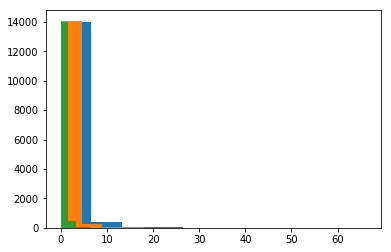

Unique values in General category:
[ 0.  1.  3.  2.  9.  6.  4.  5.  7. 12.  8. 10. 11. 14. 13. 16. 18. 21.
 15. 29. 24. 19. 48. 17. 20. 22. 33. 23. 25. 32. 66. 44. 30. 39. 53. 31.]
Unique values in Obc category:
[ 1.          0.          3.          6.          4.          8.
  7.          5.         22.         18.          9.          2.
 12.         11.         17.         25.          1.02135963 10.
 19.         14.         20.         45.         13.         15.
 26.         35.         24.         16.         21.         23.
 34.        ]
Unique values in Sc category:
[ 0.  1.  2.  9.  3.  5.  7.  4.  6.  8. 16.]


In [34]:
# Since we will be clustering General,Obc and Sc categories we need to see if there are outliers in our data
# we do this by plotting histogram and seeing the unique value in each category
plt.hist(dfc.general_total)
plt.hist(dfc.obc_total)
plt.hist(dfc.sc_total)
plt.show()
print('Unique values in General category:')
print(dfc['general_total'].unique())
print('Unique values in Obc category:')
print(dfc['obc_total'].unique())
print('Unique values in Sc category:')
print(dfc['sc_total'].unique())


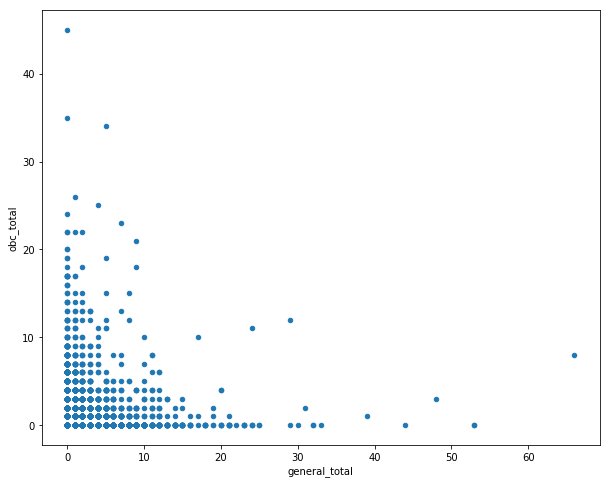

In [35]:
#Here we will visualize our data before we remove outliers
dfc.plot(kind="scatter",x="general_total", y="obc_total",figsize=(10,8))

#####  We will be removing the outliers using the quantiles i.e we will set a lower bound and upper bound and keep only the values which lie in these boundaries

######  -> Removing Outliers for General Category

In [36]:
# setting boundaries for General category
lower_bound=0.15
upper_bound=0.9995
res=dfc.general_total.quantile([lower_bound,upper_bound])
res

0.1500     0.0
0.9995    32.0
Name: general_total, dtype: float64

In [37]:
# true_index containd a boolean list having true for values within boundaries and false otherwise
true_index=(dfc.general_total.values > res.loc[lower_bound] ) & ( dfc.general_total.values < res.loc[upper_bound])
true_index

array([False, False,  True, ...,  True,  True,  True])

In [38]:
# Here we remove entries with values outside boundary
dfc=dfc[true_index]

###### -> Removing Outlier for Obc Category

In [39]:
# setting boundaries for Obc category
lower_bound2=0.15
upper_bound2=0.999
res2=dfc.obc_total.quantile([lower_bound2,upper_bound2])
res2

0.150     0.0
0.999    17.0
Name: obc_total, dtype: float64

In [40]:
# true_index containd a boolean list having true for values within boundaries and false otherwise
# Here we also remove entries with values outside boundary

true_index=(dfc.obc_total.values > res2.loc[lower_bound2] ) & ( dfc.obc_total.values < res2.loc[upper_bound2])
true_index
dfc=dfc[true_index]

##### Making numpy array X and Y

X has categorical entries ang 
Y has the Department Names

In [41]:
# making the numpy array for k means clustering
X=dfc[['general_total','obc_total','sc_total']].to_numpy()
y=dfc[['department_name']].to_numpy()
print(X.shape)
print(y.shape)

(2102, 3)
(2102, 1)


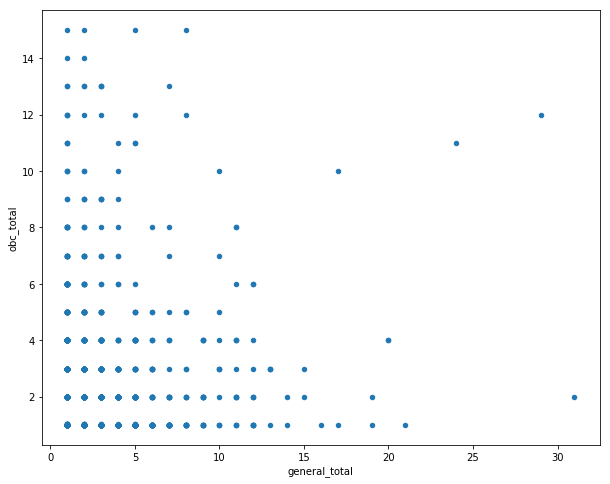

In [42]:
#to get a visual of data after removing outliers and making our array,we make a scatter plot 
dfc.plot(kind="scatter",x="general_total", y="obc_total",figsize=(10,8))

In [43]:
#Here we standardize data using Scipy Standard Scaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
print(X)

[[-0.56385161 -0.53207879 -0.50576803]
 [-0.56385161  0.48175292  0.63737648]
 [-0.56385161 -0.53207879 -0.50576803]
 ...
 [-0.56385161 -0.53207879  0.63737648]
 [-0.56385161 -0.53207879 -0.50576803]
 [-0.56385161 -0.02516293 -0.50576803]]


In [44]:
#Here we do min-max normalization on our array
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(X)
print(X)

[[-0.56385161 -0.53207879 -0.50576803]
 [-0.56385161  0.48175292  0.63737648]
 [-0.56385161 -0.53207879 -0.50576803]
 ...
 [-0.56385161 -0.53207879  0.63737648]
 [-0.56385161 -0.53207879 -0.50576803]
 [-0.56385161 -0.02516293 -0.50576803]]


In [45]:
#It is an alternate way to remove outliers using Scipy function
# we need not use it here as we have already removed the outliers
from scipy import stats
X=X[(np.abs(stats.zscore(X)) < 10).all(axis=1)]

In [46]:
#viewing the shape of our array
X.shape

(2100, 3)

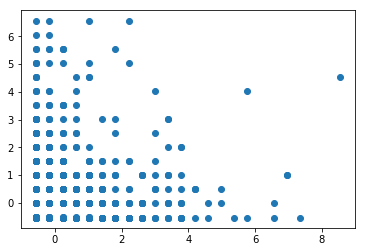

In [47]:
#data visualization after removing outliers and standardizing our array
plt.scatter(X[:, 0], X[:, 1])


# Hopkin's Statistic

In order to cluster the data it is first necessary to check whether data is fit for clustering, as the clustering algorithms forms clusters even when no meaningful outcome is seen.
<br>

Hopkins Statistic (H) is one way to do this.<br>
##### If H value is >0.5 the tendency to form clusters is good and for >0.75 the clustering tendency is at 90% confidence level.



In [48]:
from pyclustertend import hopkins
t=hopkins(X,150)
t=1-t #H value given by hopkins in python is 1- the actual value therefore we do this step
print("Hopkins Constant:",t)

Hopkins Constant: 0.9728785433254282


As seen in our data, it has a H value of 0.97 so it has a high tendency to form clusters.


# K-Means Algorithm for clustering

#### k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

The algorithm works as follows:

1.First we initialize k points, called means, randomly. <br>
2.We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
3.We repeat the process for a given number of iterations and at the end, we have our clusters.
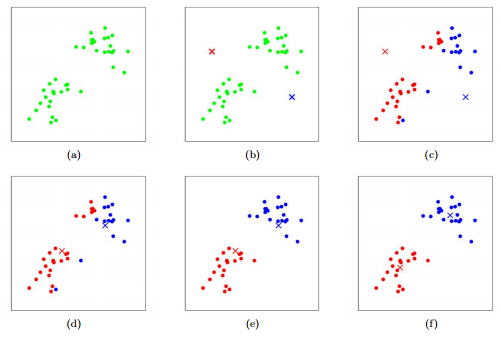
Here is the code for K Means Algorithm:

In [49]:
import matplotlib.pyplot as plt


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, K=4, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            
           # if self.plot_steps:
            #   self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            #if self.plot_steps:
             #  self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots()
  
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point,marker="o")

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=3)
       # plt.legend()
       
        plt.show()






3


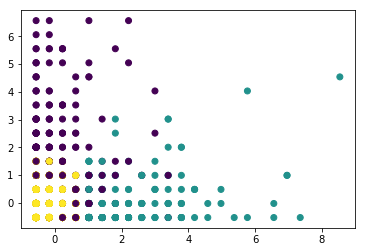

In [51]:
#calling clustering class and its func
clusters = len(np.unique(y))
print(clusters)# to print the no. of clusters
k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)
#print(y_pred)
plt.scatter(X[:,0],X[:,1],c=y_pred);
#k.plot()

### We also plot the dendogram for clustering to view the clusters with different angle

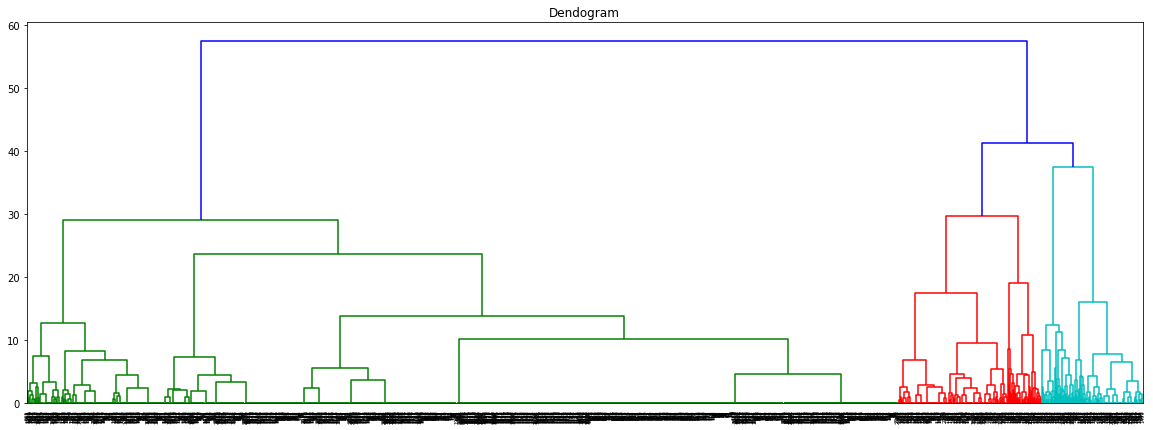

In [52]:
# Here we are making use of inbuilt functions from Sklearn to plot Dendogram
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))